In [1]:

# ...existing code...
# Importa a biblioteca TensorFlow — fornece APIs para construir e treinar modelos de ML
import tensorflow as tf

# Imprime a versão do TensorFlow carregada no ambiente
print("Versão do TensorFlow:", tf.__version__)

# instalar a versão mais recente
!pip install -q tensorflow

# ou instalar uma versão específica (exemplo)
!pip install -q tensorflow==2.14.1

Versão do TensorFlow: 2.20.0


ERROR: Could not find a version that satisfies the requirement tensorflow==2.14.1 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0, 2.19.1, 2.20.0rc0, 2.20.0)
ERROR: No matching distribution found for tensorflow==2.14.1


x_train.shape: (60000, 28, 28) y_train.shape: (60000,)
x_test.shape:  (10000, 28, 28) y_test.shape:  (10000,)
dtype: uint8    min/max pixel: 0 / 255
Distribuição labels (train): {np.uint8(0): np.int64(5923), np.uint8(1): np.int64(6742), np.uint8(2): np.int64(5958), np.uint8(3): np.int64(6131), np.uint8(4): np.int64(5842), np.uint8(5): np.int64(5421), np.uint8(6): np.int64(5918), np.uint8(7): np.int64(6265), np.uint8(8): np.int64(5851), np.uint8(9): np.int64(5949)}


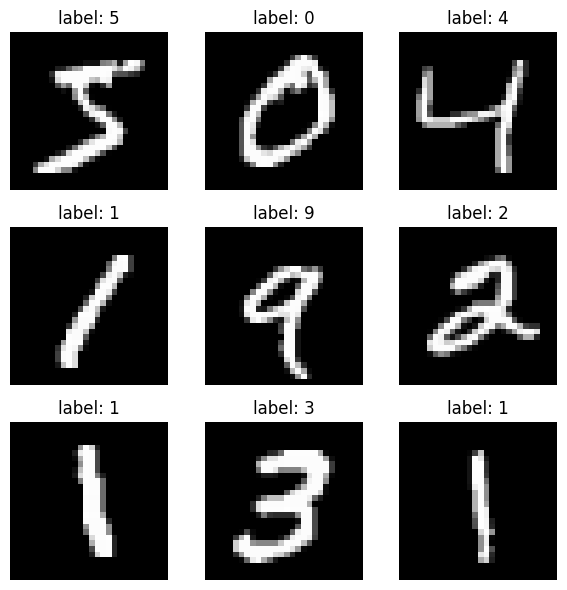

In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Carrega o dataset MNIST (imagens 28x28 em escala de cinza)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# ...existing code...
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Inspeção rápida dos dados
print("x_train.shape:", x_train.shape, "y_train.shape:", y_train.shape)
print("x_test.shape: ", x_test.shape,  "y_test.shape: ", y_test.shape)
print("dtype:", x_train.dtype, "   min/max pixel:", x_train.min(), "/", x_train.max())

# Distribuição dos rótulos no treino
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
print("Distribuição labels (train):", dict(zip(unique, counts)))

# Mostrar exemplos (9 primeiras imagens)
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
# ...existing code...


In [3]:

# Reshape para adicionar canal (altura, largura, canais) e normaliza para [0,1]
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Converte rótulos para one-hot (vetores com 10 posições)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Modelo denso simples (MLP)
modelo_simples = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),           # transforma 2D -> 1D
    layers.Dense(128, activation='relu'),             # camada totalmente conectada
    layers.Dense(10, activation='softmax')            # saída probabilística para 10 classes
])

# Compila o modelo (optimizer, loss e métricas)
modelo_simples.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Treina o modelo simples
modelo_simples.fit(x_train, y_train, epochs=5, validation_split=0.1, batch_size=128)

# Avalia no conjunto de teste
loss, acc = modelo_simples.evaluate(x_test, y_test, verbose=0)
print(f"Modelo denso — Test loss: {loss:.4f}, accuracy: {acc:.4f}")



Epoch 1/5


d:\GitHub\MiniCursoPalestra\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8968 - loss: 0.3748 - val_accuracy: 0.9500 - val_loss: 0.1771
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9497 - loss: 0.1763 - val_accuracy: 0.9667 - val_loss: 0.1242
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9640 - loss: 0.1250 - val_accuracy: 0.9710 - val_loss: 0.1001
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9720 - loss: 0.0977 - val_accuracy: 0.9730 - val_loss: 0.0902
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9778 - loss: 0.0783 - val_accuracy: 0.9733 - val_loss: 0.0867
Modelo denso — Test loss: 0.0909, accuracy: 0.9732


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


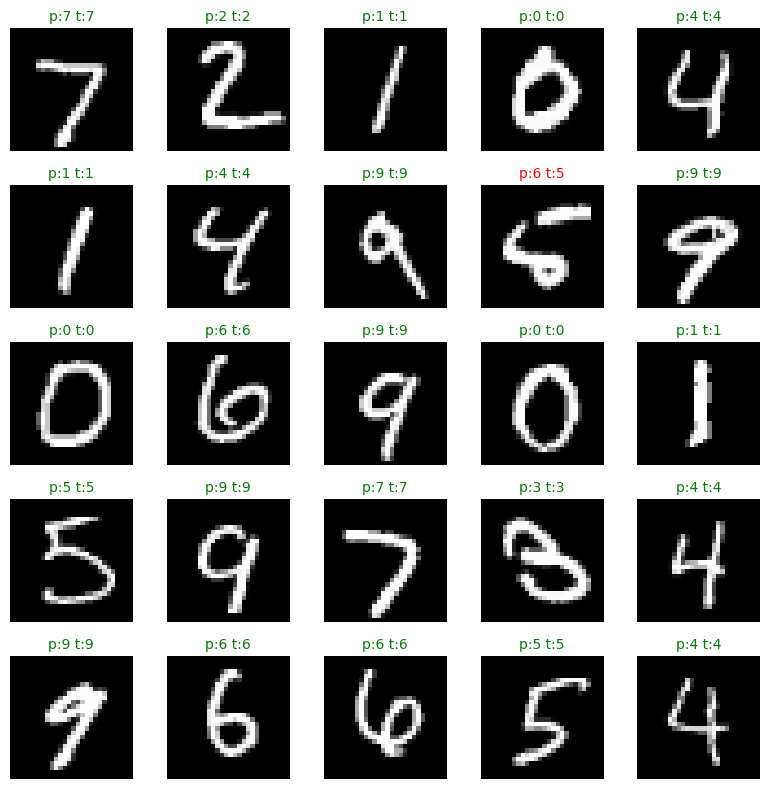

In [5]:
# ...existing code...
import numpy as np
import matplotlib.pyplot as plt

# checagens mínimas
if 'x_test' not in globals() or 'y_test' not in globals():
    raise RuntimeError("Execute a célula de carregamento/preprocessamento antes (x_test, y_test).")

# garante formato (N,28,28,1)
if x_test.ndim == 3:
    x_test = x_test.reshape(-1, 28, 28, 1)

# rótulos verdadeiros como inteiros
y_true = np.argmax(y_test, axis=1) if y_test.ndim > 1 else y_test

# # modelo disponível
# model = globals().get('modelo_simples') or globals().get('modelo_cnn')
# if model is None:
#     raise RuntimeError("Treine 'modelo_simples' ou 'modelo_cnn' antes de executar esta célula.")

# seleciona até 25 amostras e prediz
n = min(25, x_test.shape[0])
x_disp = x_test[:n]
preds = modelo_simples.predict(x_disp)
pred_labels = np.argmax(preds, axis=1)

# plota grid 5x5
plt.figure(figsize=(8,8))
for i in range(n):
    plt.subplot(5,5,i+1)
    plt.imshow(x_disp[i].squeeze(), cmap='gray')
    color = 'green' if pred_labels[i] == y_true[i] else 'red'
    plt.title(f"p:{pred_labels[i]} t:{y_true[i]}", color=color, fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()
# ...existing code...